## Imports

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import torch
import sys

from pathlib import Path
from matplotlib import pyplot as plt
sys.path.append('./')

import matplotlib as mpl

plt.rcParams['figure.figsize'] = [6, 5]

plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.facecolor'] = 'white'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

%load_ext autoreload
%autoreload 2

/home/nicolas/anaconda3/envs/torch-env/lib/python3.9/site-packages/matplotlib/pyplot.py:2422: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if fignum is False or fignum is 0:
/home/nicolas/anaconda3/envs/torch-env/lib/python3.9/site-packages/matplotlib/contour.py:871: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.extend is not 'neither':


### Parameters

In [3]:
class Args:
    gpu = 0
    channel = '3gpp'
    save_channels = 0
    pilot_alpha = [32/64]
    noise_boost = 0.001#0.001
    sample_joint = True
    use_GPU = True

args = Args()

# Load Model
target_weights = './models/model_3gpp_64x32.pt'
contents = torch.load(target_weights)
config = contents['config']

# Range of SNR, test channels and hyper-parameters
snr_range          = np.arange(-10, 22.5, 2.5) # In the plots you will see a different scale because we need to add np.log(NT)
noise_range        = 10 ** (-snr_range / 10.)

# Prepare config file
config.sampling.steps_each = 3

### Plots

#### Different number of symbs, fig 1a

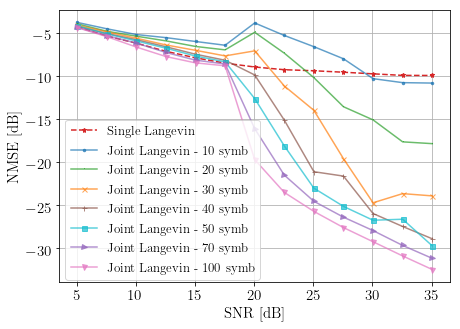

In [30]:
dir_path = 'results_seed4321'
num_symbs_list = [10, 20, 30, 40, 50, 70, 100]
num_pilots = 30
NR = 64
NT = 32

linewidth  = 1.5
markersize = 5

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:cyan', 'tab:purple', 'tab:pink', 'tab:orange', 'tab:brown']

markers_list = ['o','.',',','x', '+', 's', '>','v'] 

# Define dictionary of files
pilot_dic_num_symbs = {
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, 50, config.sampling.steps_each): 
                    r'Single Langevin',
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[0], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[0] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[1], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[1] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[2], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[2] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[3], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[3] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[4], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[4] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[5], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[5] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[6], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[6] ),
                }


# Plot SER
fig, ax = plt.subplots(figsize=(7, 5))
ii = 0

for key in pilot_dic_num_symbs:
    data = torch.load(key)
    NMSE  = data['oracle_log'][0,0,0,:,:,0]
    log_NMSE  = 10 * np.log10(NMSE)         
    log_SER = data['SER_langevin']
    if key == dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % (args.channel, num_pilots, num_symbs_list[4], config.sampling.steps_each):
        log_SER[-2] = np.nan
    
    if key.find("reuse") != -1:  
        ax.plot(snr_range + 10 * np.log10(NT),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='solid',
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                marker = markers_list[ii],
                color = colors[ii],
                alpha = 0.7)   
    else:
        ax.plot(snr_range + 10 * np.log10(NT),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='dashed',
                label=pilot_dic_num_symbs[key],
                marker = '*',
                color = colors[ii],
                markersize=markersize)        
    ii = ii+1

ax.grid(True)
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('NMSE [dB]')
ax.grid(True, which="both")
ax.legend(bbox_to_anchor=(0.53, .62), )

# Save
# plt.savefig('recon_pilots_64x32.pdf', bbox_inches = 'tight', pad_inches = 0.05, dpi=300)

#### Different number of symbs - fig 1b

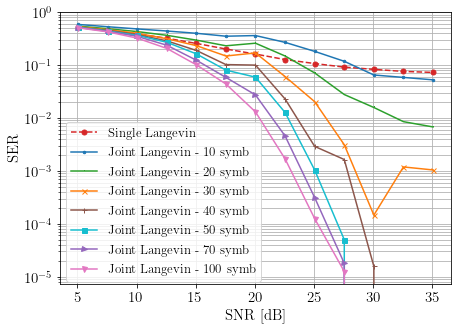

In [28]:
dir_path = 'results_seed4321'
num_symbs_list = [10, 20, 30, 40, 50, 70, 100]
num_pilots = 30
NR = 64
NT = 32

linewidth  = 1.5
markersize = 5

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:cyan', 'tab:purple', 'tab:pink', 'tab:orange', 'tab:brown']

markers_list = ['o','.',',','x', '+', 's', '>','v'] 

# Define dictionary of files
pilot_dic_num_symbs = {
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, 50, config.sampling.steps_each): 
                    r'Single Langevin',
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[0], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[0] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[1], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[1] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[2], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[2] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[3], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[3] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[4], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[4] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[5], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[5] ),
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs_list[6], config.sampling.steps_each): 
                    r'Joint Langevin - %2s symb' % (num_symbs_list[6] ),
                }


# Plot SER
fig, ax = plt.subplots(figsize=(7, 5))
ii = 0

for key in pilot_dic_num_symbs:
    data = torch.load(key)
    NMSE  = data['oracle_log'][0,0,0,:,:,0]
    log_NMSE  = 10 * np.log10(NMSE)         
    log_SER = data['SER_langevin']
    if key == dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % (args.channel, num_pilots, num_symbs_list[4], config.sampling.steps_each):
        log_SER[-2] = np.nan
    
    if key.find("reuse") != -1:  
        ax.semilogy(snr_range + 10 * np.log10(NT),log_SER,
                linewidth=linewidth,
                linestyle='solid',
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                marker = markers_list[ii],
                color = colors[ii])      
    else:
         ax.semilogy(snr_range + 10 * np.log10(NT),log_SER,
                linewidth=linewidth,
                linestyle='dashed',
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                marker = markers_list[ii],
                color = colors[ii])            
    ii = ii+1

ax.grid(True)
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('SER')
ax.grid(True, which="both")
ax.legend(bbox_to_anchor=(0.53, .62), )

# Save
# plt.savefig('recon_SER_64x32.pdf', bbox_inches = 'tight', pad_inches = 0.05, dpi=300)

#### Baselines - fig 1c

/tmp/ipykernel_58588/900341157.py:28: RuntimeWarning: divide by zero encountered in log10
  log_SER = 10 * np.log10(data['SER_langevin'])


(4, 36)

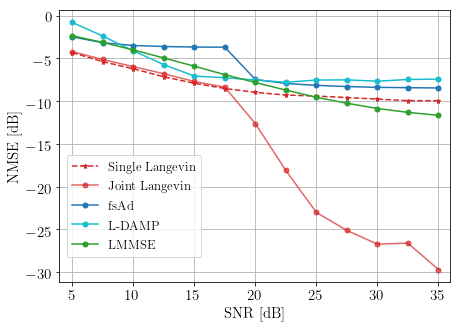

In [7]:

dir_path = 'results_seed4321'
num_pilots = 30
num_symbs = 50
NR = 64
NT = 32

linewidth  = 1.5
markersize = 5

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:cyan', 'tab:purple', 'tab:pink', 'tab:orange', 'tab:brown']


pilot_dic_num_symbs = {
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs, config.sampling.steps_each): 
                    r'Single Langevin',
            dir_path + '/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (args.channel, num_pilots, num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin',
                }

fig, ax = plt.subplots(figsize=(7, 5))

for key in pilot_dic_num_symbs:
    data = torch.load(key)
    NMSE  = data['oracle_log'][0,0,0,:,:,0]
    log_NMSE  = 10 * np.log10(NMSE)        
    log_SER = 10 * np.log10(data['SER_langevin'])
    
    if key.find("reuse") != -1:  
        ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='solid',
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                marker = 'o',
                alpha = 0.7,
                color = 'tab:red')    
    else:
        ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='dashed',
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                marker = '*',
                color = 'tab:red')      

# data_lasso = torch.load(str(Path(dir_path).parent.absolute()) 
#                     + '/results_l1_baseline_lifted1/l1_results_Nt32_Nr64_fineAlpha_30pilots_lr.pt')   
# complete_log = data_lasso['complete_log'][0,0,0,0,:,-1,:]

data_fsad = torch.load(str(Path(dir_path).parent.absolute()) 
                    + '/results_l1_baseline_lifted4/l1_results_Nt32_Nr64_fineAlpha_30pilots_lr.pt')   
complete_log_fsad = data_fsad['complete_log'][0,0,0,0,:,-1,:]

data_ml = torch.load(str(Path(dir_path).parent.absolute()) 
                    + '/results_ml_baseline/results_Nt32_Nr64_30pilots_lr.pt')   
complete_log_ml = data_ml['oracle_log'][0,0,:,:]

data_ldamp = torch.load(str(Path(dir_path).parent.absolute()) 
                    + '/results_ldamp/train-3gpp_test-3gpp/results.pt')   
complete_log_ldamp = data_ldamp['avg_nmse'][0,0,:]

# ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]), 10*np.log10(np.mean(complete_log, axis=-1)),
#            label = 'Lasso',
#            linewidth=linewidth,
#            markersize=markersize,
#            marker = 'o')
ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]), 10*np.log10(np.mean(complete_log_fsad, axis=-1)),
           label = 'fsAd',
           linewidth=linewidth,
           marker = 'o',
           markersize=markersize)
ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]), 10*np.log10(complete_log_ldamp),
           label = 'L-DAMP',
           linewidth=linewidth,
           markersize=markersize,
           marker = 'o',
           color = 'tab:cyan')
ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]), 10*np.log10(np.mean(complete_log_ml, axis=-1)),
           label = 'LMMSE',
           linewidth=linewidth,
           markersize=markersize,
           marker = 'o',
           color = 'tab:green')

ax.grid(True, which="both")
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('NMSE [dB]')
ax.legend(bbox_to_anchor=(0.38, 0.49))
ax.set_xlim([4, 36])

## Save
# plt.savefig('recon_baseline_64x32.pdf', bbox_inches = 'tight', pad_inches = 0.05, dpi=300)

#### Different numb of pilots

In [ ]:

dir_path = 'results_seed4321'
pilots_val = [24, 27, 30, 32, 37, 64]
# [15, 20, 22, 25, 27, 32, 37, 45, 64]
NR = 64
NT = 32
num_symbs = 50
pp = 2
pilot_dic_num_symbs = {
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[0], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[0],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[1], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[1],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[2], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[2],
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
        #             (NR, NT, args.channel, pilots_val[3], num_symbs, config.sampling.steps_each): 
        #             r'Single Langevin - %2s pilots' % pilots_val[3],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[4], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[4],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[5], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[5],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[0], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[0] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[1], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[1] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[2], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[2] ),
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
        #             (NR, NT, args.channel, pilots_val[3], num_symbs, config.sampling.steps_each): 
        #             r'Joint Langevin - %2s pilot' % (pilots_val[3] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[4], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[4] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step_adapt.pt' % 
                    (NR, NT, args.channel, pilots_val[5], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[5] ),
                }

import matplotlib as mpl

plt.rcParams['figure.figsize'] = [6, 5]

plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.facecolor'] = 'white'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

linewidth  = 1.5
markersize = 5
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown']
markers_list = ['o','x', '+', 's', '>','o','x', '+', 's', '>'] 
index_color = 0
for key in pilot_dic_num_symbs:
    data = torch.load(key)
    
    if key == dir_path + '/%s_numpilots%.1f_numsymbols%.1f_T_per_variable_with_Hhat.pt' % (args.channel, 1, batch_size_x):
        NMSE  = data['oracle_log'][0,0,0,:,:,0]
        log_NMSE  = 10 * np.log10(NMSE)
        log_SER = 10 * np.log10(data['SER_langevin'])
    else:
        NMSE  = data['oracle_log'][0,0,0,:,:,0]
        log_NMSE  = 10 * np.log10(NMSE)        
        log_SER = 10 * np.log10(data['SER_langevin'])
    
    if key.find("reuse") != -1:  
        ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='solid',
                marker = markers_list[index_color],
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                alpha = 0.7,
                color = colors[index_color]) 
        # ax[1].plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_SER,
        #         linewidth=linewidth,
        #         linestyle='solid',
        #         label=pilot_dic_num_symbs[key],
        #         markersize=markersize)      
    else:
        ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='dashed',
                marker = markers_list[index_color],
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                color = colors[index_color])      
        # ax[1].plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_SER,
        #         linewidth=linewidth,
        #         linestyle='dashed',
        #         label=pilot_dic_num_symbs[key],
        #         markersize=markersize)     
    index_color = index_color + 1    
    

ax.grid(True, which="both")
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('NMSE [dB]')
ax.legend(bbox_to_anchor=(0.47, .62), )
# ax[1].grid(True, which="both")
# ax[1].set_xlabel('SNR [dB]')
# ax[1].set_ylabel('SER')
# ax[1].legend(bbox_to_anchor=(1.0, 1.0))
# ax[0].set_xlim([5, 20])
ax.set_xlim([4, 36])
# fig.set_subplots_adjust(wspace=0.36)    
# plt.title('32 pilots and Kronecker channel of size 64x32', fontsize = 20)
## Save
plt.savefig('recon_pilots_64x32.pdf', bbox_inches = 'tight',
    pad_inches = 0.05, dpi=300)

In [ ]:
dir_path = 'results_seed4321'
pilots_val = [20, 22, 25, 27, 30, 32, 37]
NR = 64
NT = 32
num_symbs = 50
pp = 2
pilot_dic_num_symbs = {
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
        #             (NR, NT, args.channel, pilots_val[0], num_symbs, config.sampling.steps_each): 
        #             r'Single Langevin - %2s pilots' % pilots_val[0],
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
        #             (NR, NT, args.channel, pilots_val[1], num_symbs, config.sampling.steps_each): 
        #             r'Single Langevin - %2s pilots' % pilots_val[1],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[2], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[2],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[3], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[3],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[4], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[4],
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[5], num_symbs, config.sampling.steps_each): 
                    r'Single Langevin - %2s pilots' % pilots_val[5],
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_batch_temp_adapt_step3.pt' % 
        #             (NR, NT, args.channel, pilots_val[6], num_symbs, config.sampling.steps_each): 
        #             r'Single Langevin - %2s pilots' % pilots_val[6],
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
        #             (NR, NT, args.channel, pilots_val[0], num_symbs, config.sampling.steps_each): 
        #             r'Joint Langevin - %2s pilot' % (pilots_val[0] ),
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
        #             (NR, NT, args.channel, pilots_val[1], num_symbs, config.sampling.steps_each): 
        #             r'Joint Langevin - %2s pilot' % (pilots_val[1] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[2], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[2] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[3], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[3] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[4], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[4] ),
            dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
                    (NR, NT, args.channel, pilots_val[5], num_symbs, config.sampling.steps_each): 
                    r'Joint Langevin - %2s pilot' % (pilots_val[5] ),
        #     dir_path + '/final_experiments/%2sx%2s/batch/%s_numpilots%.1f_numsymbols%.1f_%1sjointstepxnoiselevel_reuse_batch_temp_adapt_step3.pt' % 
        #             (NR, NT, args.channel, pilots_val[6], num_symbs, config.sampling.steps_each): 
        #             r'Joint Langevin - %2s pilot' % (pilots_val[6] )
                }


import matplotlib as mpl

plt.rcParams['figure.figsize'] = [6, 5]

plt.rc('font', size=11)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.facecolor'] = 'white'
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

linewidth  = 3.5
markersize = 5
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['red, blue', 'gray', 'pink', 'green', 'orange', 'cyan']

for key in pilot_dic_num_symbs:
    data = torch.load(key)
    if key == dir_path + '/%s_numpilots%.1f_numsymbols%.1f_T_per_variable_with_Hhat.pt' % (args.channel, 1, batch_size_x):
        NMSE  = data['oracle_log'][0,0,0,:,:,0]
        log_NMSE  = 10 * np.log10(NMSE)
        log_SER = 10 * np.log10(data['SER_langevin'])
    else:
        NMSE  = data['oracle_log'][0,0,0,:,:,0]
        log_NMSE  = 10 * np.log10(NMSE)        
        log_SER = 10 * np.log10(data['SER_langevin'])
    
    if key.find("reuse") != -1:  
        ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='solid',
                marker = '*',
                label=pilot_dic_num_symbs[key],
                markersize=markersize,
                alpha = 0.7) 
        # ax[1].plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_SER,
        #         linewidth=linewidth,
        #         linestyle='solid',
        #         label=pilot_dic_num_symbs[key],
        #         markersize=markersize)      
    else:
        ax.plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_NMSE[:,-1],
                linewidth=linewidth,
                linestyle='dashed',
                marker = 'o',
                label=pilot_dic_num_symbs[key],
                markersize=markersize)      
        # ax[1].plot(snr_range + 10 * np.log10(config.data.image_size[1]),log_SER,
        #         linewidth=linewidth,
        #         linestyle='dashed',
        #         label=pilot_dic_num_symbs[key],
        #         markersize=markersize)      

ax.grid(True, which="both")
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('NMSE [dB]')
ax.legend(bbox_to_anchor=(0.53, .62), )
# ax[1].grid(True, which="both")
# ax[1].set_xlabel('SNR [dB]')
# ax[1].set_ylabel('SER')
# ax[1].legend(bbox_to_anchor=(1.0, 1.0))
# ax[0].set_xlim([5, 20])
ax.set_xlim([3, 40])
# fig.set_subplots_adjust(wspace=0.36)    
# plt.title('32 pilots and Kronecker channel of size 64x32', fontsize = 20)
## Save
plt.savefig('recon_pilots_64x32.pdf', bbox_inches = 'tight',
    pad_inches = 0.05, dpi=300)